<a href="https://colab.research.google.com/github/g10kaviya/Crop-Yield-Prediction-System/blob/main/DMTrev3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CROP YIELD PREDICTION MODEL - DATA MINING PROJECT**

**MOUNTING AND LOADING THE DATASET FROM GOOGLE DRIVE**

In [ ]:
from google.colab import drive
import pandas as pd

print("\n")
# Mount the Google Drive
drive.mount('/content/drive')

# Define the file path in Google Drive
drive_path = "/content/drive/My Drive/Colab Notebooks/crop_yield.csv"

# Load the dataset from Google Drive
df = pd.read_csv(drive_path)



Mounted at /content/drive


**DISPLAYING BASIC INFORMATION OF THE ORIGINAL DATASET**

In [ ]:
print("\n")
print("DESCRIPTION OF THE ORIGINAL DATASET")
print("\n")
print(df.info())
print("\n")
display(df.head())
print("\n")
print("Mean Crop Yield [of the Original Dataset] :", df['Yield'].mean())



DESCRIPTION OF THE ORIGINAL DATASET


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  object 
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  object 
 3   State            19689 non-null  object 
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(2), object(3)
memory usage: 1.5+ MB
None




,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,Arecanut,1997,Whole Year,Assam,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,Arhar/Tur,1997,Kharif,Assam,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,Castor seed,1997,Kharif,Assam,796.0,22,2051.4,75755.32,246.76,0.238333
3,Coconut,1997,Whole Year,Assam,19656.0,126905000,2051.4,1870661.52,6093.36,5238.051739
4,Cotton(lint),1997,Kharif,Assam,1739.0,794,2051.4,165500.63,539.09,0.420909




Mean Crop Yield [of the Original Dataset] : 79.95400913008669


**CONVERSION OF CATEGORICAL VALUES TO NUMERICAL VALUES**

In [ ]:
from sklearn.preprocessing import LabelEncoder

print("\n")

# Convert categorical values to numerical values
le = LabelEncoder()
df['Crop'] = le.fit_transform(df['Crop'])
df['Season'] = le.fit_transform(df['Season'])
df['State'] = le.fit_transform(df['State'])

# Save the modified dataset back to Google Drive
modified_drive_path = "/content/drive/My Drive/Colab Notebooks/crop_yield_modified.csv"
df.to_csv(modified_drive_path, index=False)
print(f"Modified dataset saved at: {modified_drive_path}")



Modified dataset saved at: /content/drive/My Drive/Colab Notebooks/crop_yield_modified.csv


**HEAT MAP OF THE RAW DATASET**



FEATURE COORELATION HEAT MAP




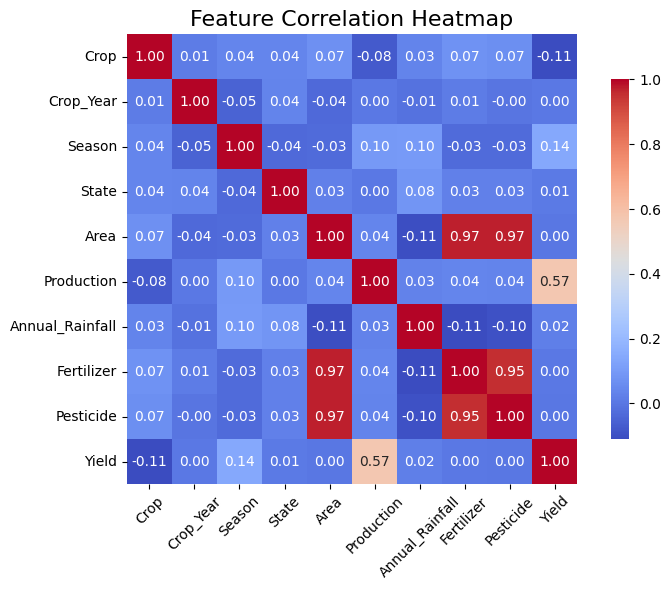

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

print('\n')
print("FEATURE COORELATION HEAT MAP")
print("\n")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**DISTIRBUTION OF THE NUMERICAL ATTRIBUTES (RAW DATASET)**



DISTRIBUTION OF THE NUMERICAL ATTRIBUTES (RAW DATASET)




<Figure size 1200x800 with 0 Axes>

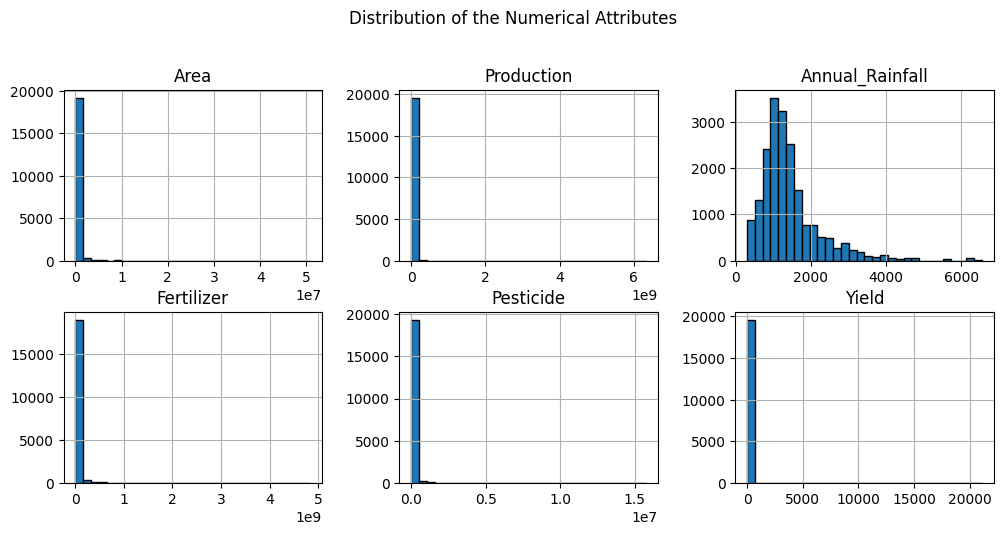

In [ ]:
print("\n")
print("DISTRIBUTION OF THE NUMERICAL ATTRIBUTES (RAW DATASET)")
print("\n")

# List of numerical columns for visualization
numerical_cols = ['Area', 'Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield']

# Display Histograms
plt.figure(figsize=(12, 8))
df[numerical_cols].hist(bins=30, figsize=(12, 8), layout=(3, 3), edgecolor='black')
plt.suptitle("Distribution of the Numerical Attributes")
plt.show()

**BOX PLOT OF THE NUMERICAL ATTRIBUTES (RAW DATASET)**



BOX PLOT OF THE NUMERICAL ATTRIBUTES (RAW DATASET)




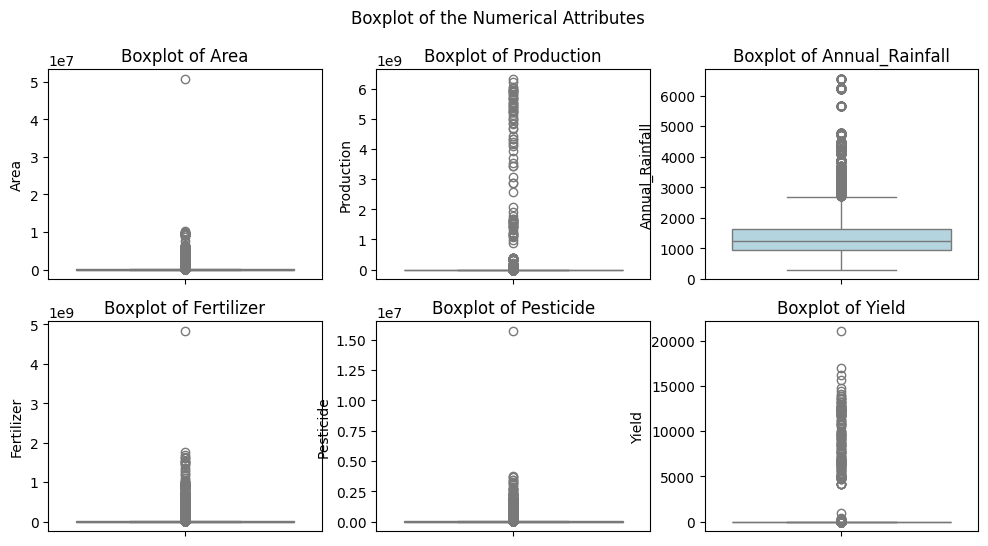

In [ ]:
print("\n")
print("BOX PLOT OF THE NUMERICAL ATTRIBUTES (RAW DATASET)")
print("\n")

# Display Box Plots to detect outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f'Boxplot of {col}')
plt.suptitle("Boxplot of the Numerical Attributes")
plt.show()

**PAIR PLOT (RAW DATASET)**



PAIR PLOT (RAW DATASET)

Generating pair plot for columns: ['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Yield']


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


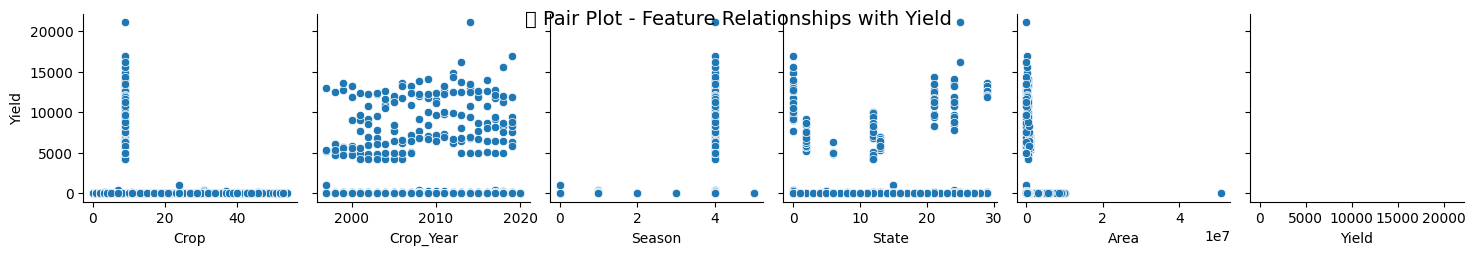


Generating pair plot for columns: Index(['Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'], dtype='object')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


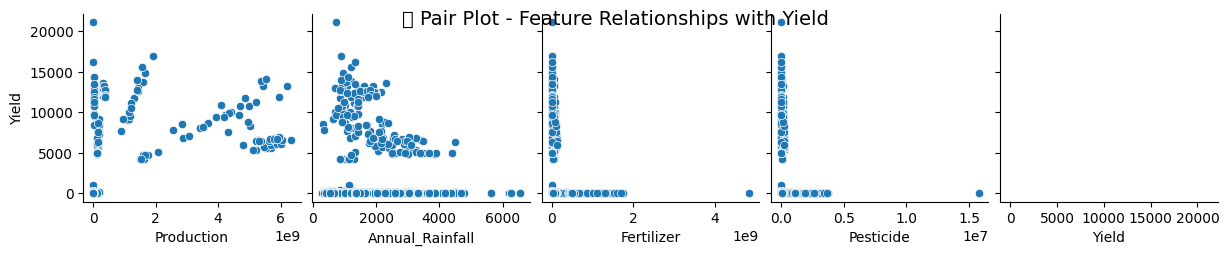

In [ ]:
print("\n")
print("PAIR PLOT (RAW DATASET)")

# Pair Plot (Feature Relationships with Yield)
for i in range(0, len(df.columns), 5):
    cols_subset = df.columns[i:i+5]
    if 'Yield' not in cols_subset and 'Yield' in df.columns:
        cols_subset = list(cols_subset) + ['Yield']

    print(f"\nGenerating pair plot for columns: {cols_subset}")
    g = sns.pairplot(data=df, x_vars=cols_subset, y_vars=['Yield'])
    g.fig.suptitle("🔗 Pair Plot - Feature Relationships with Yield", fontsize=14)
    plt.show()

**IQR METHOD TO DETECT AND REMOVE OUTLIERS**

In [ ]:
# Method 1
# Detect & Remove Outliers using IQR Method
print("\n")
print("Removing Outliers using the IQR Method")
print("\n")

def remove_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df.loc[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df

# Print dataset shape before removing outliers
print("Before Removing Outliers:", df.shape)
print("\n")

# Remove outliers from numerical columns
df_cleaned = remove_outliers(df, numerical_cols)

# Print dataset shape after removing outliers
print("After Removing Outliers:", df_cleaned.shape)
print("\n")

# Save cleaned dataset
cleaned_drive_path = "/content/drive/My Drive/Colab Notebooks/crop_yield_cleaned.csv"
df_cleaned.to_csv(cleaned_drive_path, index=False)
print(f"Cleaned dataset saved at: {cleaned_drive_path}")

# Load the cleaned dataset for further analysis
df = pd.read_csv(cleaned_drive_path)



Removing Outliers using the IQR Method


Before Removing Outliers: (19689, 10)


After Removing Outliers: (8779, 10)


Cleaned dataset saved at: /content/drive/My Drive/Colab Notebooks/crop_yield_cleaned.csv


**DISPLAYING BASIC INFORMATION OF THE DATASET AFTER REMOVING THE OUTLIERS USING THE IQR METHOD**

In [ ]:
# Display basic info

print("\n")
print("DESCRIPTION OF THE MODIFIED DATASET")
print("\n")
print(df.info())
display(df.head())
print("\n")
print("Mean Crop Yield [Using IQR method]:", df['Yield'].mean())



DESCRIPTION OF THE MODIFIED DATASET


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8779 entries, 0 to 8778
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             8779 non-null   int64  
 1   Crop_Year        8779 non-null   int64  
 2   Season           8779 non-null   int64  
 3   State            8779 non-null   int64  
 4   Area             8779 non-null   float64
 5   Production       8779 non-null   int64  
 6   Annual_Rainfall  8779 non-null   float64
 7   Fertilizer       8779 non-null   float64
 8   Pesticide        8779 non-null   float64
 9   Yield            8779 non-null   float64
dtypes: float64(5), int64(5)
memory usage: 686.0 KB
None


,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,1,1997,1,2,6637.0,4685,2051.4,631643.29,2057.47,0.710435
1,8,1997,1,2,796.0,22,2051.4,75755.32,246.76,0.238333
2,11,1997,1,2,1739.0,794,2051.4,165500.63,539.09,0.420909
3,13,1997,4,2,13587.0,9073,2051.4,1293074.79,4211.97,0.643636
4,16,1997,2,2,2979.0,1507,2051.4,283511.43,923.49,0.465455




Mean Crop Yield [Using IQR method]: 0.9677227750939742


**HEAT MAP (DATASET AFTER CLEANING USING THE IQR METHOD)**



HEAT MAP - After the IQR Method




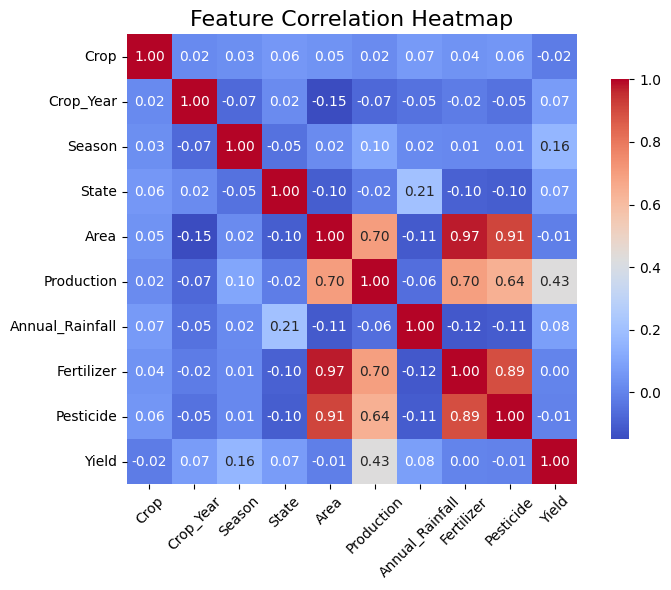

In [ ]:
correlation_matrix = df.corr()

print("\n")
print("HEAT MAP - After the IQR Method")
print("\n")

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar_kws={"shrink": 0.8})
plt.title("Feature Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**DISTRIBUTION OF THE NUMERICAL ATTRIBUTES (AFTER THE IQR PROCESS)**



DISTRIBUTION OF THE NUMERICAL ATTRIBUTES (AFTER THE IQR PROCESS)




<Figure size 1200x800 with 0 Axes>

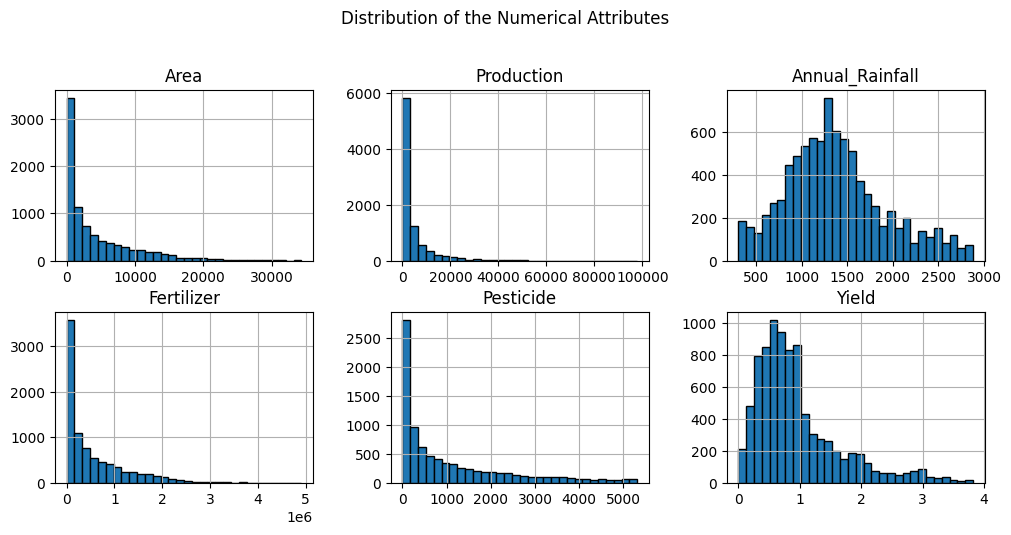

In [ ]:
print("\n")
print("DISTRIBUTION OF THE NUMERICAL ATTRIBUTES (AFTER THE IQR PROCESS)")
print("\n")

# Display Histograms
plt.figure(figsize=(12, 8))
df[numerical_cols].hist(bins=30, figsize=(12, 8), layout=(3, 3), edgecolor='black')
plt.suptitle("Distribution of the Numerical Attributes")
plt.show()

**BOX PLOT OF THE NUMERICAL ATTRBIUTES (AFTER THE IQR METHOD)**



BOX PLOT OF THE NUMERICAL ATTRIBUTES (AFTER THE IQR METHOD)




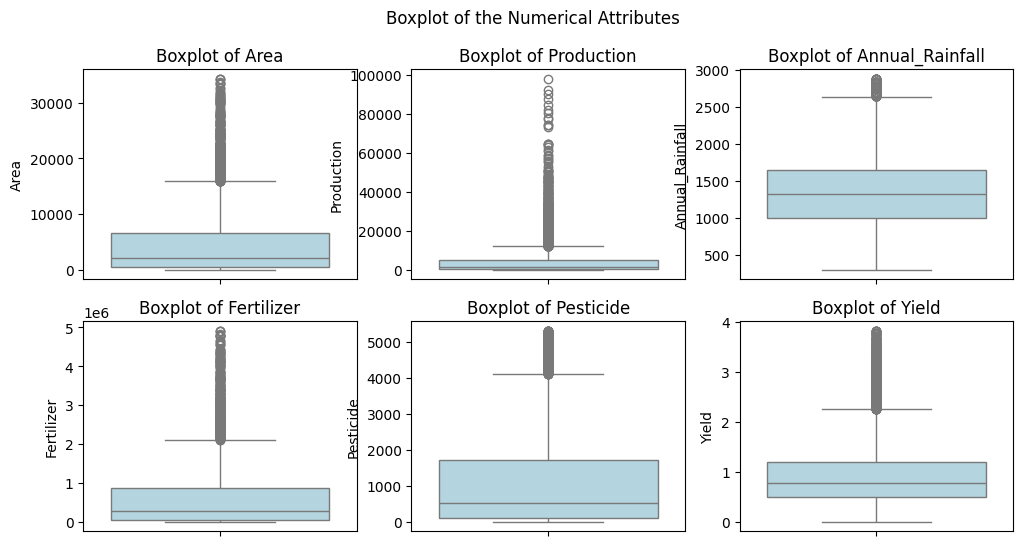

In [ ]:
print("\n")
print("BOX PLOT OF THE NUMERICAL ATTRIBUTES (AFTER THE IQR METHOD)")
print("\n")

# Display Box Plots to detect outliers
plt.figure(figsize=(12, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col], color="lightblue")
    plt.title(f'Boxplot of {col}')
    plt.suptitle("Boxplot of the Numerical Attributes")
plt.show()

**DISPLAYING THE PAIR PLOT - FOR THE DATASET CLEANED USING THE IQR METHOD**



PAIR PLOT - IQR METHOD

Generating pair plot for columns: ['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Yield']


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


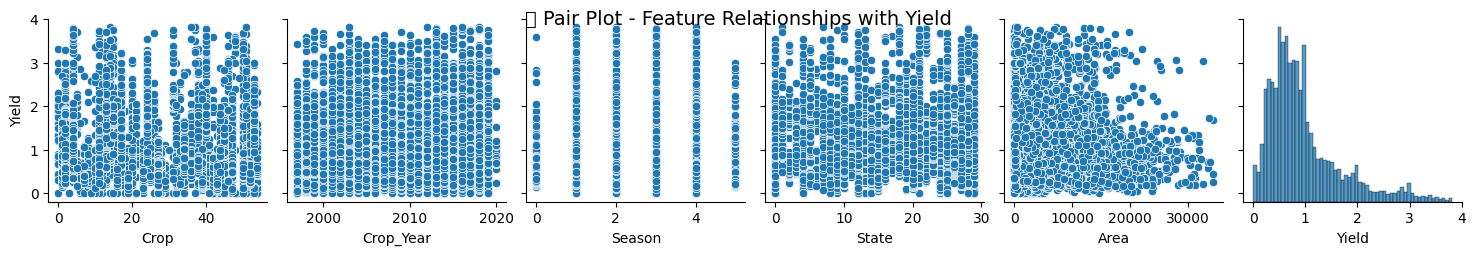


Generating pair plot for columns: Index(['Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'], dtype='object')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


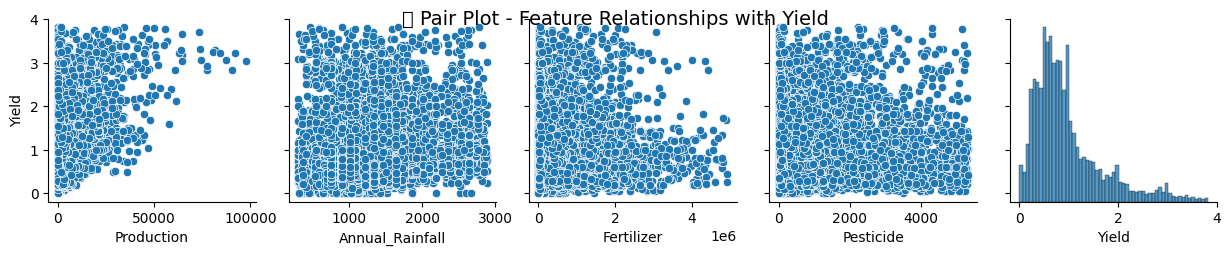

In [ ]:
print("\n")
print("PAIR PLOT - IQR METHOD")

# Pair Plot (Feature Relationships with Yield)
for i in range(0, len(df.columns), 5):
    cols_subset = df.columns[i:i+5]
    if 'Yield' not in cols_subset and 'Yield' in df.columns:
        cols_subset = list(cols_subset) + ['Yield']

    print(f"\nGenerating pair plot for columns: {cols_subset}")
    g = sns.pairplot(data=df, x_vars=cols_subset, y_vars=['Yield'])
    g.fig.suptitle("🔗 Pair Plot - Feature Relationships with Yield", fontsize=14)
    plt.show()

**DISTRIBUTION OF CROP YIELD - IQR METHOD**



DISTRIBUTION OF CROP YIELD (IQR METHOD)




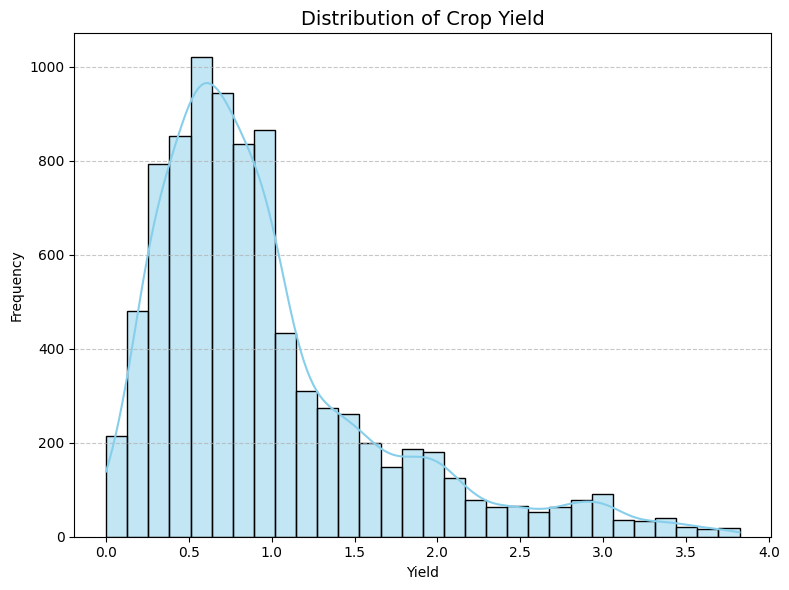

In [ ]:
print("\n")
print("DISTRIBUTION OF CROP YIELD (IQR METHOD)")
print("\n")

plt.figure(figsize=(8, 6))
sns.histplot(df['Yield'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Crop Yield', fontsize=14)
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**SCALING THE DATA - IQR METHOD CLEANED DATASET**

In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the data
scaler = StandardScaler()
X = df.drop(columns=['Yield'])  # Features
y = df['Yield']  # Target

# Apply scaling only to the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

**SPLITTING THE DATASET INTO TWO CLASSES - TRAINING CLASS AND TESTING CLASS**

In [ ]:
from sklearn.model_selection import train_test_split

# Train - test split (Now using scaled data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

**MODEL TRAINING AND EVALUATION - IQR METHOD**

In [ ]:

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("\n")
print("MODEL TRAINING AND EVALUATION (IQR METHOD)")

# Model Training and Evaluation
models = {
    "Random Forest Regression Algorithm": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regression Algorithm": XGBRegressor(n_estimators=100, learning_rate=0.1),
    "Decision Tree Regression Algorithm": DecisionTreeRegressor(random_state=42),
    "Support Vector Regression Algorithm": SVR(kernel='rbf'),
    "Gradient Boosting Regression Algorithm": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Create an empty list to store model results
model_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)  # Predictions on training set
    y_pred_test = model.predict(X_test)  # Predictions on test set

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)  # R² for training data

    # Store results in a list
    model_results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R² (Train)": r2_train,
        "R² (Test)": r2_test
    })

    print(f"\n{name}:")
    print("MAE:", mae)
    print("RMSE:", rmse)
    print("R² (Train):", r2_train)
    print("R² (Test):", r2_test)



MODEL TRAINING AND EVALUATION (IQR METHOD)

Random Forest Regression Algorithm:
MAE: 0.10502716232956719
RMSE: 0.1925789566883324
R² (Train): 0.9895235562956115
R² (Test): 0.923153164654262

XGBoost Regression Algorithm:
MAE: 0.11157254741677806
RMSE: 0.19255020157475045
R² (Train): 0.9732317018637603
R² (Test): 0.9231761118603543

Decision Tree Regression Algorithm:
MAE: 0.16006339246355353
RMSE: 0.29326516639004735
R² (Train): 1.0
R² (Test): 0.8217911405737996

Support Vector Regression Algorithm:
MAE: 0.22683792321011384
RMSE: 0.40786392783553865
R² (Train): 0.6704510575940572
R² (Test): 0.6553018735661719

Gradient Boosting Regression Algorithm:
MAE: 0.1600108494193643
RMSE: 0.25042498027232074
R² (Train): 0.894244108665947
R² (Test): 0.8700537878093773


**DISPLAYING THE BEST MODEL (BASED ON THE DATASET CLEANED USING THE IQR METHOD)**

In [ ]:
# Convert model results into a DataFrame
results_df = pd.DataFrame(model_results)

# Sort by highest R² score on test data
results_df_sorted = results_df.sort_values(by="R² (Test)", ascending=False)

# Display the top models
print("\n Best Models [Using IQR method] Based on R² Score (Test):")
print("\n")
display(results_df_sorted[["Model", "R² (Test)"]])
iqr_results_df = results_df_sorted.copy()

# Calculate MSE (Mean Squared Error) from RMSE
results_df_sorted["MSE"] = results_df_sorted["RMSE"] ** 2  # MSE = RMSE^2


 Best Models [Using IQR method] Based on R² Score (Test):




,Model,R² (Test)
1,XGBoost Regression Algorithm,0.923176
0,Random Forest Regression Algorithm,0.923153
4,Gradient Boosting Regression Algorithm,0.870054
2,Decision Tree Regression Algorithm,0.821791
3,Support Vector Regression Algorithm,0.655302


**BAR PLOT FOR EACH MODEL AND METRIC - IQR METHOD**



BAR PLOT FOR EACH MODEL AND METRIC - IQR METHOD




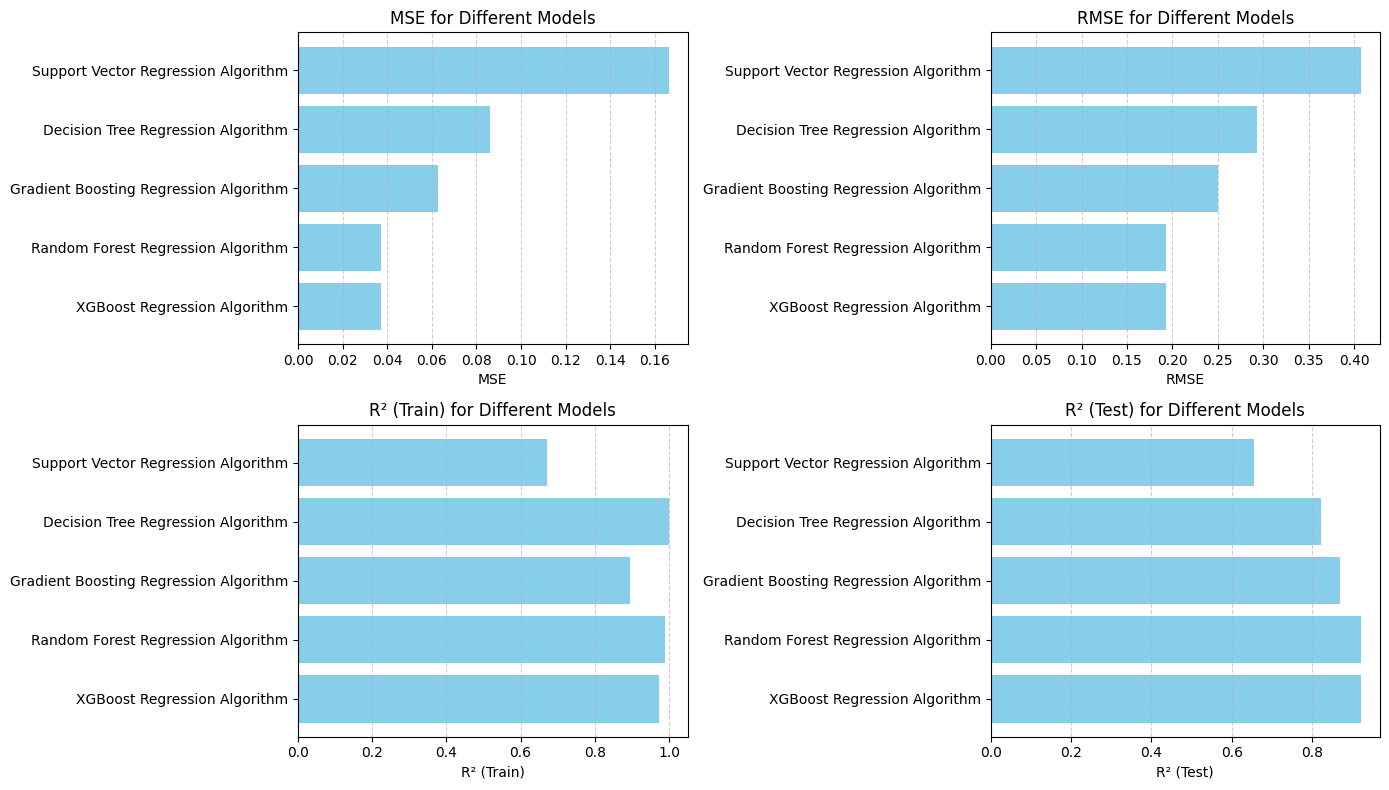

In [ ]:
print("\n")
print("BAR PLOT FOR EACH MODEL AND METRIC - IQR METHOD")

# Define metric names
metrics = ["MSE", "RMSE", "R² (Train)", "R² (Test)"]
print("\n")

# Set figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)  # 2x2 grid layout
    plt.barh(results_df_sorted["Model"], results_df_sorted[metric], color="skyblue")
    plt.xlabel(metric)
    plt.title(f"{metric} for Different Models")
    plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

**MODEL ACCURACY ON THE TRAINING CLASS AND THE TESTING CLASS**



MODEL ACCURACY ON THE TRAINING CLASS AND THE TESTING CLASS




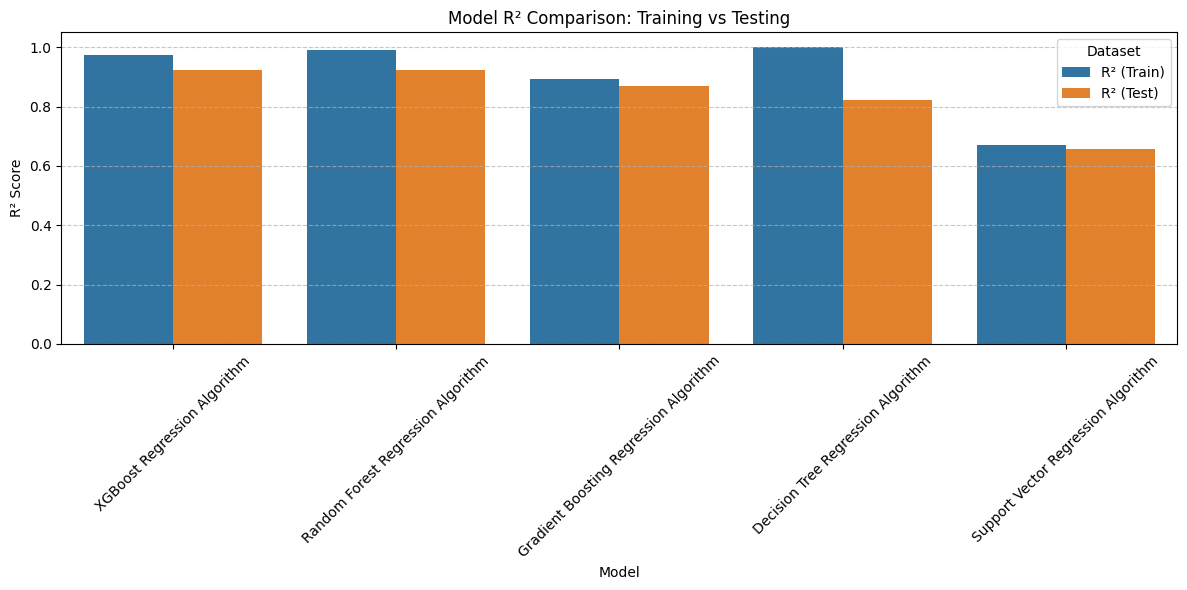

In [ ]:
print("\n")
print("MODEL ACCURACY ON THE TRAINING CLASS AND THE TESTING CLASS")
print("\n")

# Create a DataFrame with training and testing R²
train_test_df = pd.DataFrame({
    'Model': iqr_results_df['Model'],  # or winsor_results_df
    'R² (Train)': iqr_results_df['R² (Train)'],
    'R² (Test)': iqr_results_df['R² (Test)']
})

# Melt the DataFrame for Seaborn
melted_df = train_test_df.melt(id_vars='Model', var_name='Dataset', value_name='R² Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Model', y='R² Score', hue='Dataset')
plt.title("Model R² Comparison: Training vs Testing")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**LINE PLOT - IQR METHOD**



LINE PLOT (IQR METHOD)




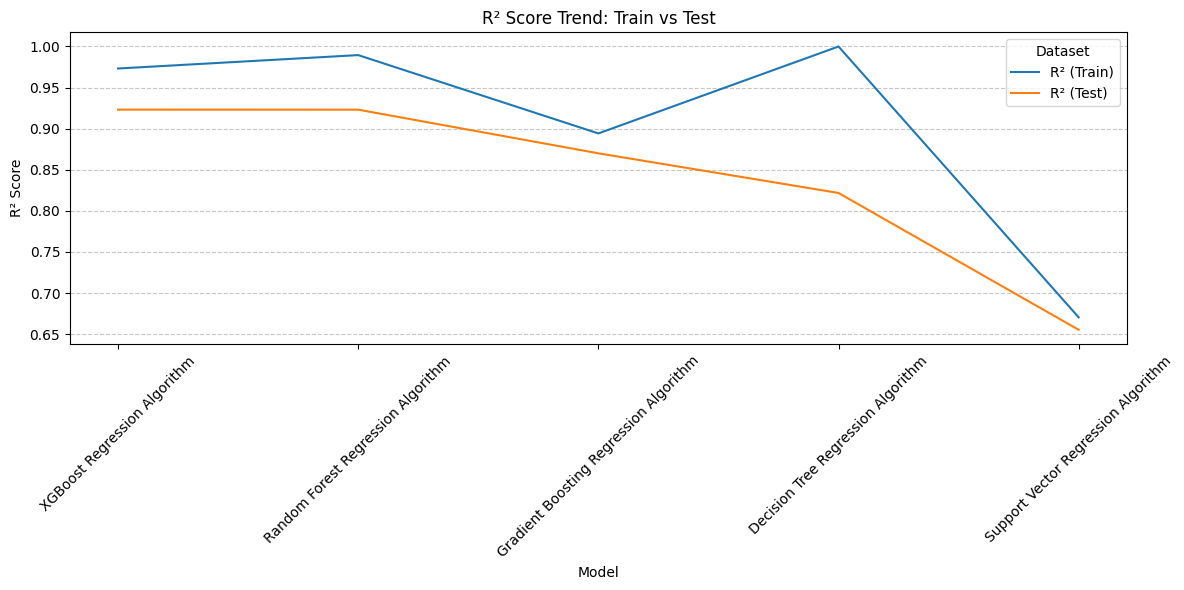

In [ ]:
print("\n")
print("LINE PLOT (IQR METHOD)")
print("\n")

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='Model', y='R² Score', hue='Dataset')
plt.title("R² Score Trend: Train vs Test")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**PLOT FEATURE IMPORTANCE FOR THE TREE - BASED MODELS**



FEATURE IMPORTANCE FOR THE MODELS (IQR METHOD)




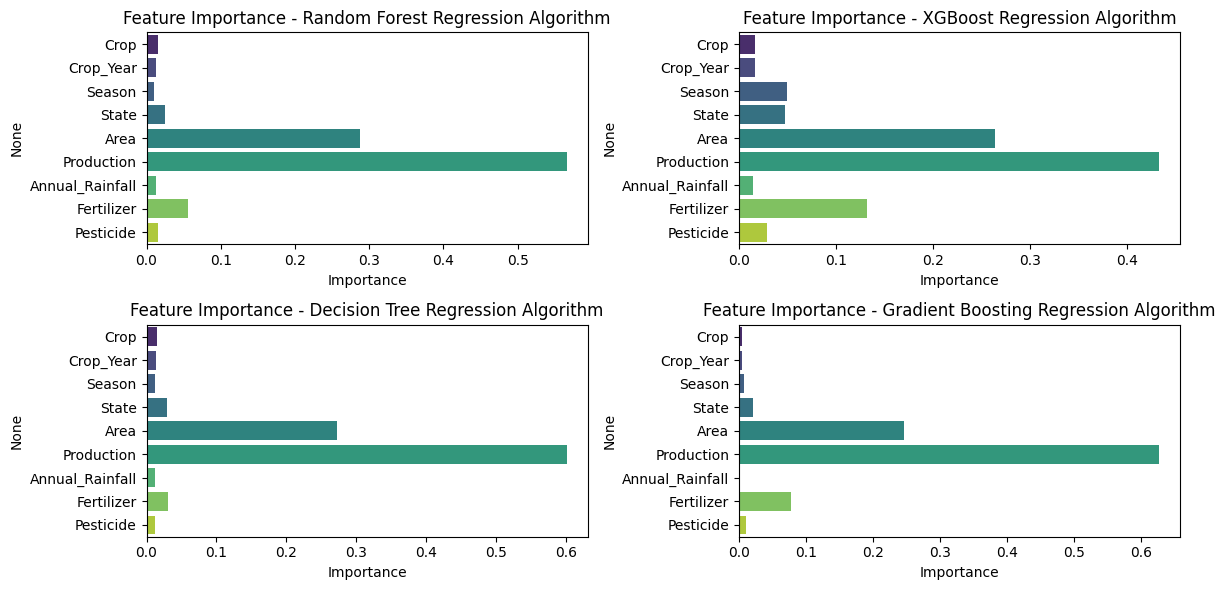

In [ ]:
# Plot feature importance for tree - based models
print("\n")
print("FEATURE IMPORTANCE FOR THE MODELS (IQR METHOD)")
print("\n")

feature_importance_models = ["Random Forest Regression Algorithm", "XGBoost Regression Algorithm", "Decision Tree Regression Algorithm", "Gradient Boosting Regression Algorithm"]
plt.figure(figsize=(12, 6))
for i, name in enumerate(feature_importance_models, 1):
    if name in models:
        model = models[name]
        model.fit(X_train, y_train)
        feature_importance = model.feature_importances_
        plt.subplot(2, 2, i)
        sns.barplot(x=feature_importance, y=X.columns, hue=X.columns, palette="viridis", legend=False)
        plt.title(f"Feature Importance - {name}")
        plt.xlabel("Importance")
plt.tight_layout()
plt.show()

**WINSORIZATION METHOD TO HANDLE THE OUTLIERS**

In [ ]:
from scipy.stats.mstats import winsorize

# Method 2
# Winsorization Method to handle the outliers

print("\n")
print("USING WINSORIZATION METHOD TO HANDLE THE OUTLIERS")
print("\n")

# Create a winsorized copy
df = pd.read_csv(modified_drive_path)
winsorized_df = df.copy()
for col in numerical_cols:
    winsorized_df[col] = winsorize(winsorized_df[col], limits=[0.10, 0.10])

# Save winsorized dataset
output_path = "/content/drive/MyDrive/Colab Notebooks/crop_yield_winsorized.csv"
winsorized_df.to_csv(output_path, index=False)

# Load the winsorized dataset for further analysis
df = pd.read_csv(output_path)

print(df.info())
print("\n")
display(df.head())
print("\n")
print("Mean Crop Yield [Using Winsorization Method]:", df['Yield'].mean())



USING WINSORIZATION METHOD TO HANDLE THE OUTLIERS


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19689 entries, 0 to 19688
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Crop             19689 non-null  int64  
 1   Crop_Year        19689 non-null  int64  
 2   Season           19689 non-null  int64  
 3   State            19689 non-null  int64  
 4   Area             19689 non-null  float64
 5   Production       19689 non-null  int64  
 6   Annual_Rainfall  19689 non-null  float64
 7   Fertilizer       19689 non-null  float64
 8   Pesticide        19689 non-null  float64
 9   Yield            19689 non-null  float64
dtypes: float64(5), int64(5)
memory usage: 1.5 MB
None




,Crop,Crop_Year,Season,State,Area,Production,Annual_Rainfall,Fertilizer,Pesticide,Yield
0,0,1997,4,2,73814.0,56708,2051.4,7024878.38,22882.34,0.796087
1,1,1997,1,2,6637.0,4685,2051.4,631643.29,2057.47,0.710435
2,8,1997,1,2,796.0,147,2051.4,75755.32,246.76,0.346250
3,9,1997,4,2,19656.0,865669,2051.4,1870661.52,6093.36,9.540000
4,11,1997,1,2,1739.0,794,2051.4,165500.63,539.09,0.420909




Mean Crop Yield [Using Winsorization Method]: 2.352672796407842


**VISUAL COMPARISON OF THE DATASET BEFORE AND AFTER THE WINSORIZATION PROCESS**



VISUAL COMPARISON OF THE DATASET BEFORE AND AFTER THE WINSORIZATION PROCESS




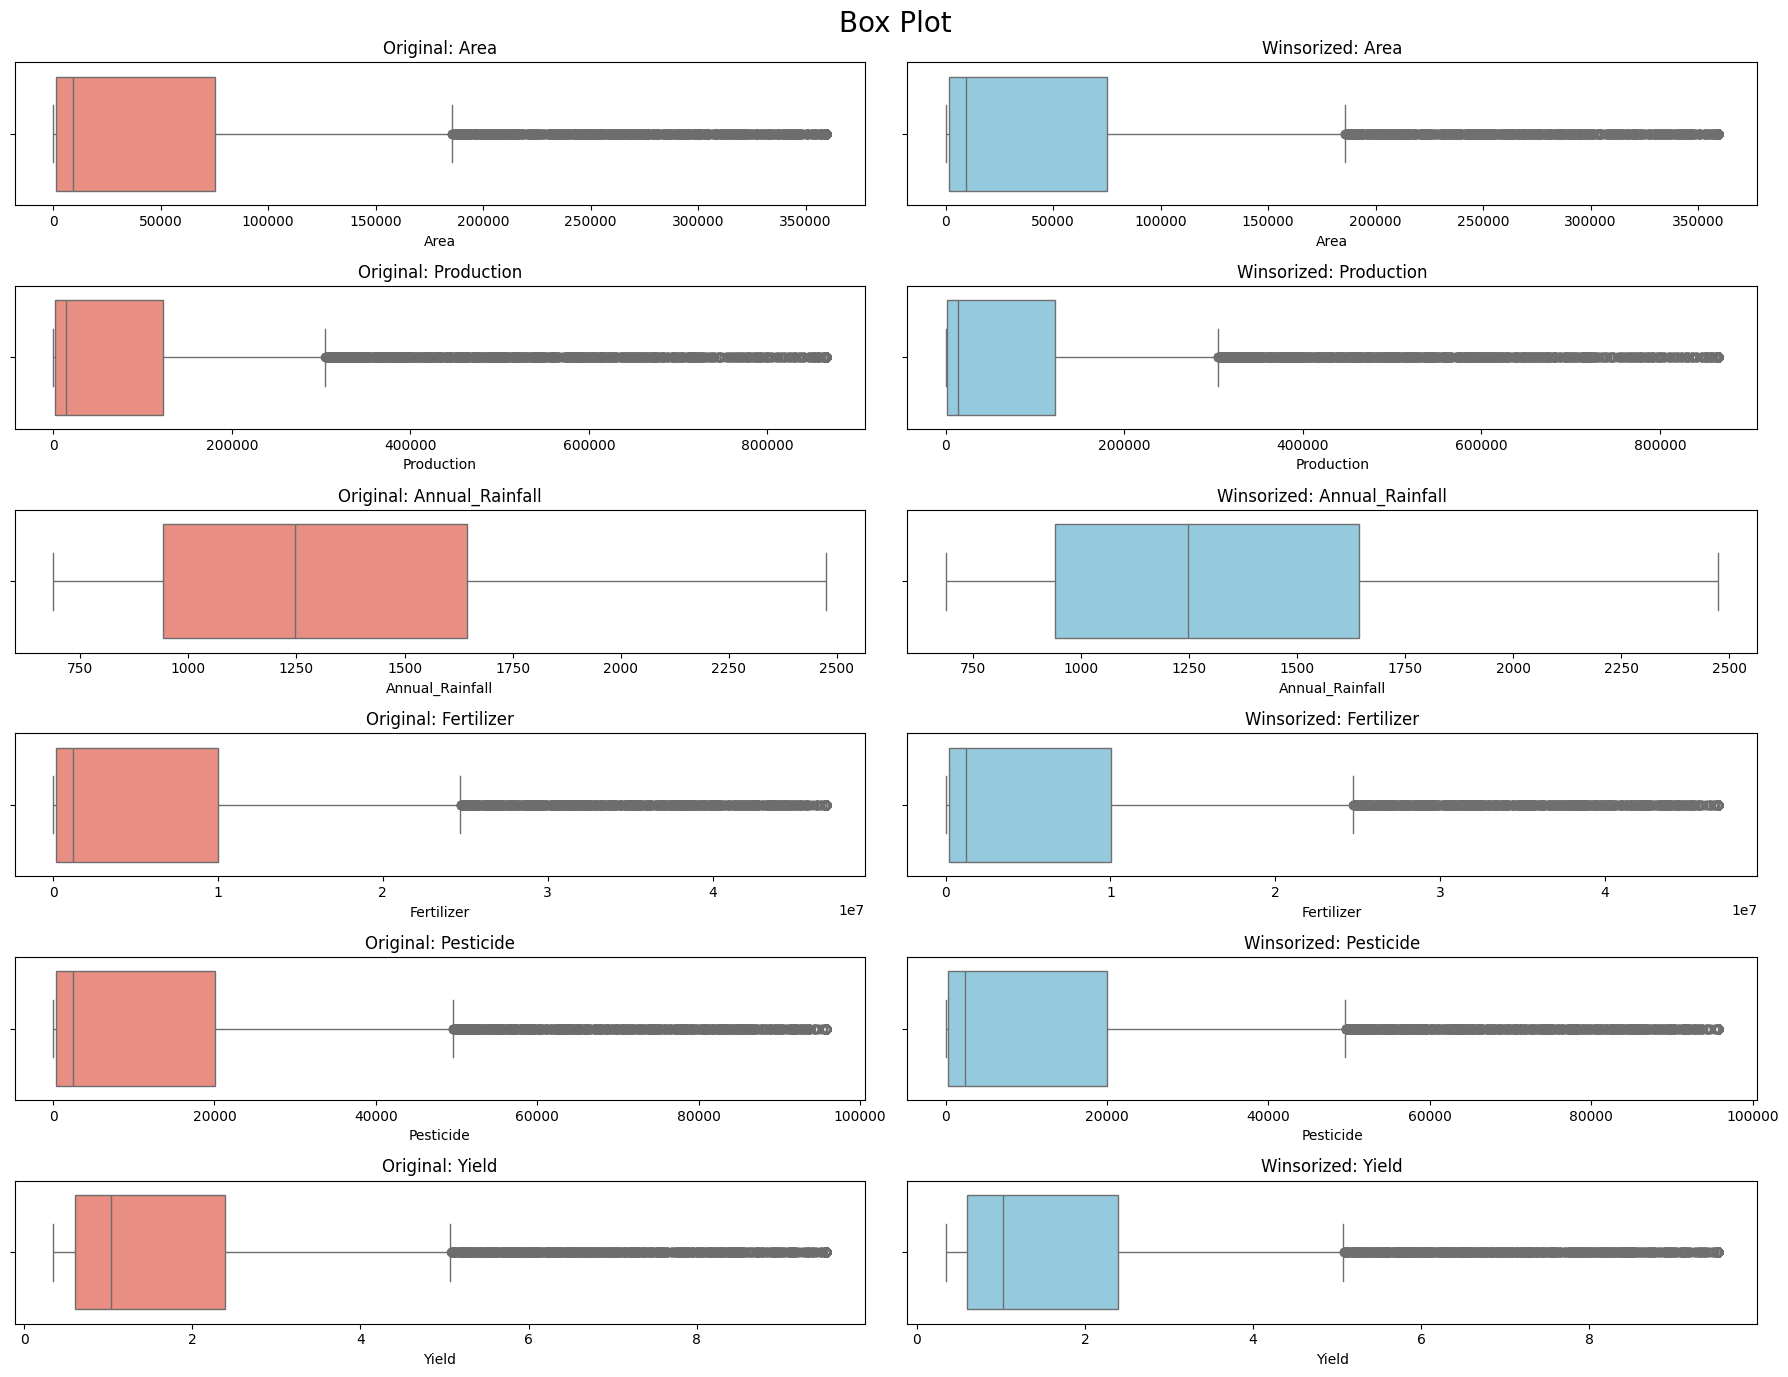

In [ ]:
print("\n")
print("VISUAL COMPARISON OF THE DATASET BEFORE AND AFTER THE WINSORIZATION PROCESS")
print("\n")

# Visual Comparison - Before and After
plt.figure(figsize=(18, 14))
plt.suptitle("Box Plot", fontsize=20)

for i, col in enumerate(numerical_cols):
    # Original
    plt.subplot(6, 2, 2*i+1)
    sns.boxplot(x=df[col], color='salmon')
    plt.title(f'Original: {col}')

    # Winsorized
    plt.subplot(6, 2, 2*i+2)
    sns.boxplot(x=winsorized_df[col], color='skyblue')
    plt.title(f'Winsorized: {col}')

plt.tight_layout()
plt.show()

**FEATURE COORELATION HEAT MAP OF THE WINSORIZED DATASET**



FEATURE COORELATION HEATMAP FOR THE WINSORIZED DATASET




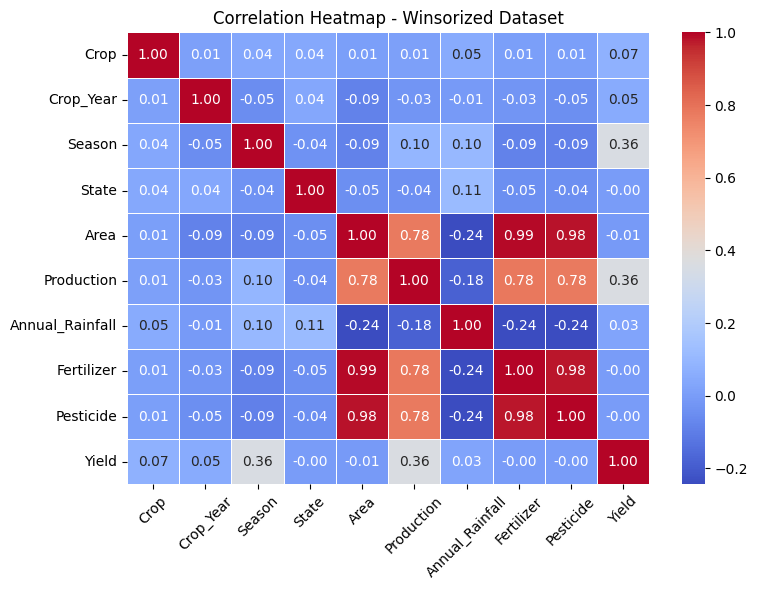

In [ ]:
print("\n")
print("FEATURE COORELATION HEATMAP FOR THE WINSORIZED DATASET")
print("\n")

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap - Winsorized Dataset")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**PAIR PLOT - WINSORIZED DATASET**



PAIR PLOT (WINSORIZED DATASET)

Generating pair plot for columns: ['Crop', 'Crop_Year', 'Season', 'State', 'Area', 'Yield']


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


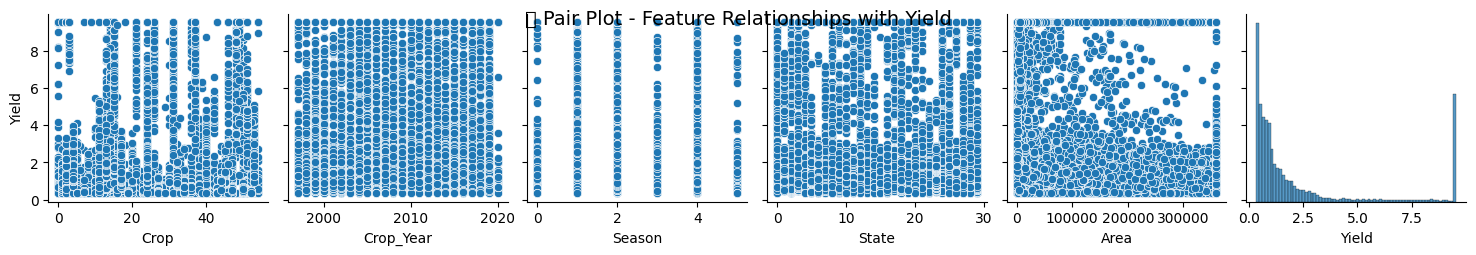


Generating pair plot for columns: Index(['Production', 'Annual_Rainfall', 'Fertilizer', 'Pesticide', 'Yield'], dtype='object')


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


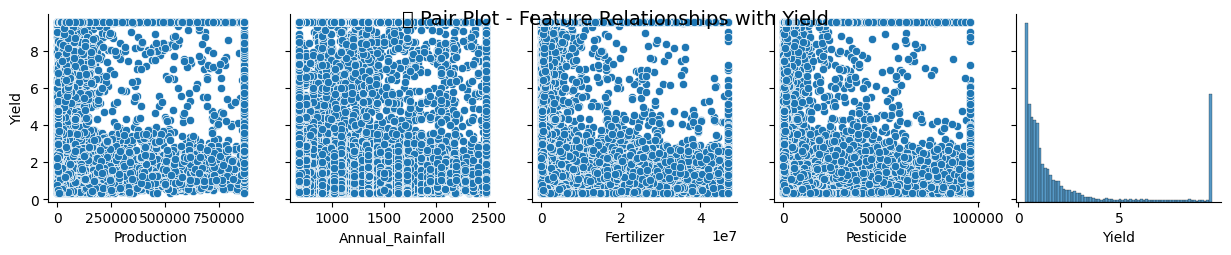

In [ ]:
print("\n")
print("PAIR PLOT (WINSORIZED DATASET)")

# Pair Plot (Feature Relationships with Yield)
for i in range(0, len(df.columns), 5):
    cols_subset = df.columns[i:i+5]
    if 'Yield' not in cols_subset and 'Yield' in df.columns:
        cols_subset = list(cols_subset) + ['Yield']

    print(f"\nGenerating pair plot for columns: {cols_subset}")
    g = sns.pairplot(data=df, x_vars=cols_subset, y_vars=['Yield'])
    g.fig.suptitle("🔗 Pair Plot - Feature Relationships with Yield", fontsize=14)
    plt.show()

**DISTRIBUTION OF THE CROP YIELD FEATURE - WINSORIZED DATASET**



DISTRIBUTION OF THE CROP YIELD FEATURE (WINSORIZED DATASET)




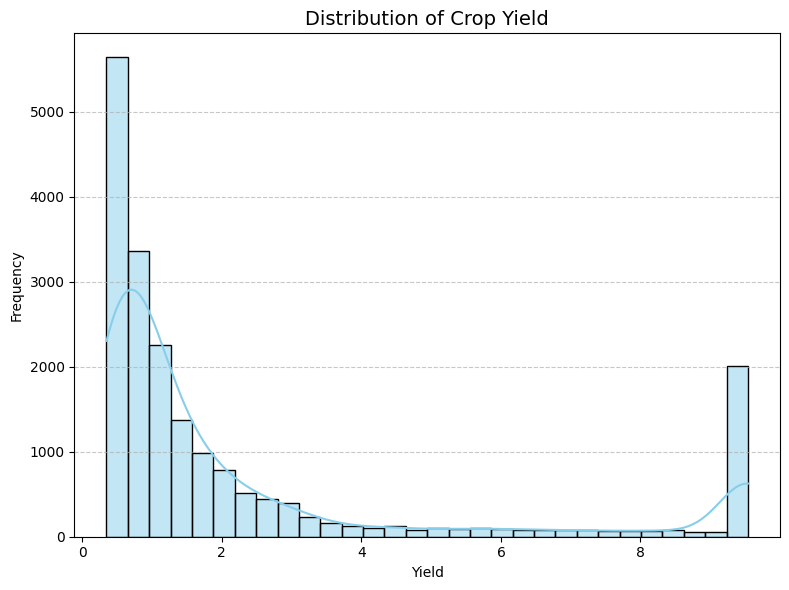

In [ ]:
print("\n")
print("DISTRIBUTION OF THE CROP YIELD FEATURE (WINSORIZED DATASET)")
print("\n")

plt.figure(figsize=(8, 6))
sns.histplot(df['Yield'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Crop Yield', fontsize=14)
plt.xlabel('Yield')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**SCALE THE DATA AND SPLIT THE DATA INTO THE TRAINING AND TESTING CLASSES**

In [ ]:
# Scale the data
scaler = StandardScaler()
X = df.drop(columns=['Yield'])  # Features
y = df['Yield']  # Target

# Apply scaling only to the features
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Train - test split (Now using scaled data)
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

**MODEL TRAINING AND EVALUATION - WINSORIZED DATASET**

In [ ]:
print("\n")
print("MODEL TRAINING AND EVALUATION (WINSORIZED DATASET)")

# Model Training and Evaluation
models = {
    "Random Forest Regression Algorithm": RandomForestRegressor(n_estimators=100, random_state=42),
    "XGBoost Regression Algorithm": XGBRegressor(n_estimators=100, learning_rate=0.1),
    "Decision Tree Regression Algorithm": DecisionTreeRegressor(random_state=42),
    "Support Vector Regression Algorithm": SVR(kernel='rbf'),
    "Gradient Boosting Regression Algorithm": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Create an empty list to store model results
model_results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)  # Predictions on training set
    y_pred_test = model.predict(X_test)  # Predictions on test set

    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
    r2_test = r2_score(y_test, y_pred_test)
    r2_train = r2_score(y_train, y_pred_train)  # R² for training data

    # Store results in a list
    model_results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R² (Train)": r2_train,
        "R² (Test)": r2_test
    })

    print(f"\n{name}:")
    print("MAE:", mae)
    print("RMSE:", rmse)
    print("R² (Train):", r2_train)
    print("R² (Test):", r2_test)



MODEL TRAINING AND EVALUATION (WINSORIZED DATASET)

Random Forest Regression Algorithm:
MAE: 0.2037907648835538
RMSE: 0.5163104448274126
R² (Train): 0.9958803581542123
R² (Test): 0.9676978645701563

XGBoost Regression Algorithm:
MAE: 0.26269450616499646
RMSE: 0.5255354140738622
R² (Train): 0.9812800662729609
R² (Test): 0.966533261826598

Decision Tree Regression Algorithm:
MAE: 0.2537434144073139
RMSE: 0.7051242419096485
R² (Train): 1.0
R² (Test): 0.939752267871228

Support Vector Regression Algorithm:
MAE: 0.9129273704498847
RMSE: 1.8907162676463278
R² (Train): 0.5514375925395523
R² (Test): 0.5668262470827476

Gradient Boosting Regression Algorithm:
MAE: 0.45475996100171306
RMSE: 0.8009622707426134
R² (Train): 0.9200611648922373
R² (Test): 0.9222619700727035


**IDENTIFYING THE BEST MODEL WITH THE DATASET CLEANED USING THE WINSORIZATION METHOD**

In [ ]:
# Convert model results into a DataFrame
results_df = pd.DataFrame(model_results)

# Sort by highest R² score on test data
results_df_sorted = results_df.sort_values(by="R² (Test)", ascending=False)

# Display the top models
print("\n Best Models [Using Winsorization Method] Based on R² Score (Test):")
print("\n")
display(results_df_sorted[["Model", "R² (Test)"]])
winsor_results_df = results_df_sorted.copy()


 Best Models [Using Winsorization Method] Based on R² Score (Test):




,Model,R² (Test)
0,Random Forest Regression Algorithm,0.967698
1,XGBoost Regression Algorithm,0.966533
2,Decision Tree Regression Algorithm,0.939752
4,Gradient Boosting Regression Algorithm,0.922262
3,Support Vector Regression Algorithm,0.566826


**BAR PLOT - WINSORIZED DATASET**



BAR PLOT FOR EACH MODEL AND METRIC (WINSORIZED DATASET)




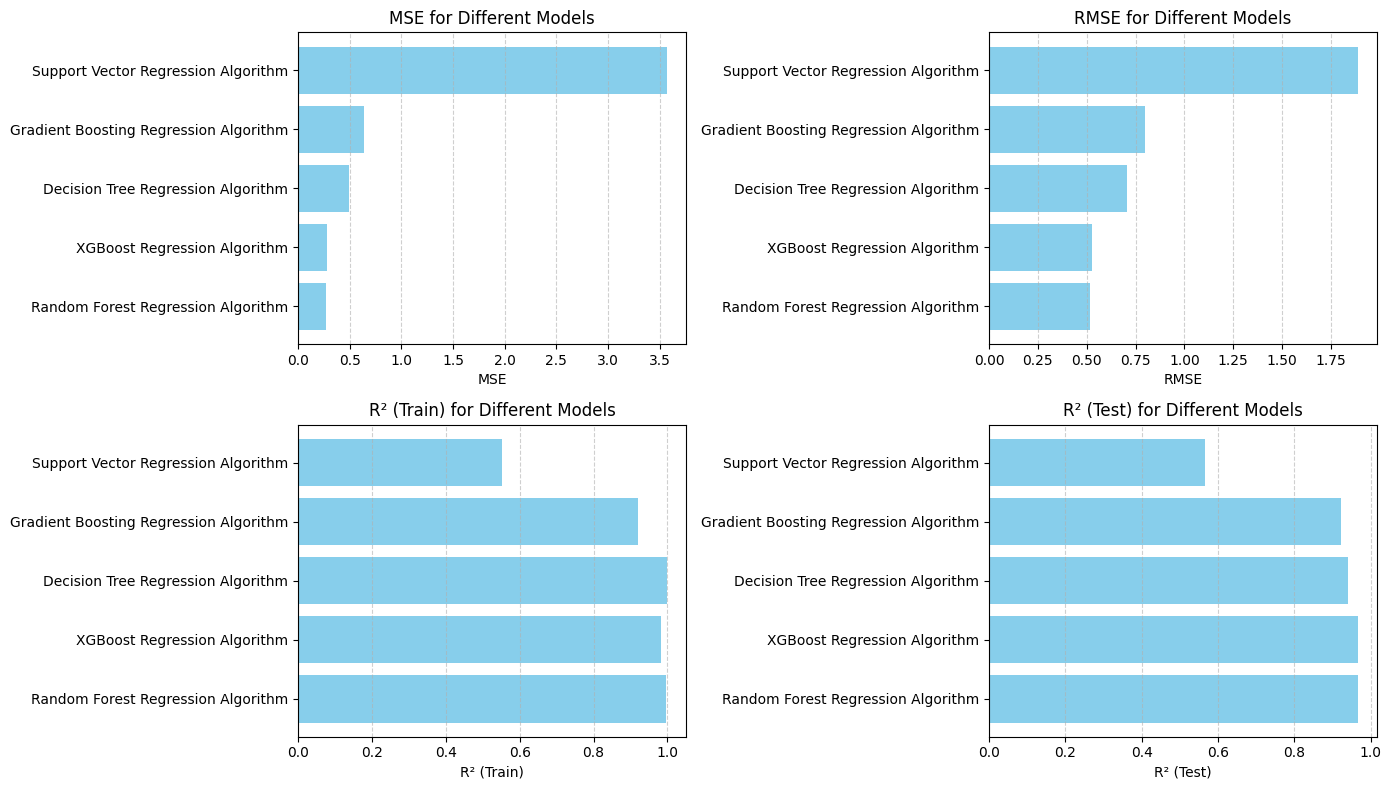

In [ ]:
print("\n")
print("BAR PLOT FOR EACH MODEL AND METRIC (WINSORIZED DATASET)")
print("\n")

# Calculate MSE (Mean Squared Error) from RMSE
winsor_results_df["MSE"] = winsor_results_df["RMSE"] ** 2  # MSE = RMSE^2

# Define metric names
metrics = ["MSE", "RMSE", "R² (Train)", "R² (Test)"]

# Set figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for each metric
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)  # 2x2 grid layout
    plt.barh(winsor_results_df["Model"], winsor_results_df[metric], color="skyblue")
    plt.xlabel(metric)
    plt.title(f"{metric} for Different Models")
    plt.grid(axis="x", linestyle="--", alpha=0.6)

plt.tight_layout()
plt.show()

**MODEL ACCURACY ON THE TRAINING CLASS AND THE TESTING CLASS**



MODEL ACCURACY ON THE TRAINING CLASS AND THE TESTING CLASS




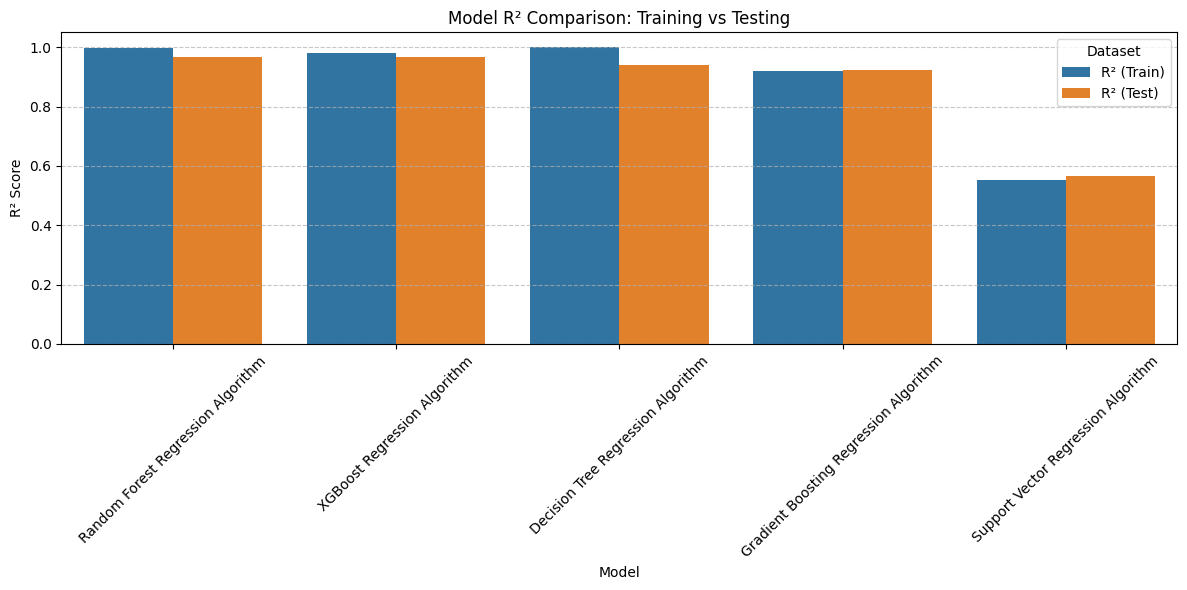

In [ ]:
print("\n")
print("MODEL ACCURACY ON THE TRAINING CLASS AND THE TESTING CLASS")
print("\n")

# Create a DataFrame with training and testing R²
train_test_df = pd.DataFrame({
    'Model': winsor_results_df['Model'],  # or winsor_results_df
    'R² (Train)': winsor_results_df['R² (Train)'],
    'R² (Test)': winsor_results_df['R² (Test)']
})

# Melt the DataFrame for Seaborn
melted_df = train_test_df.melt(id_vars='Model', var_name='Dataset', value_name='R² Score')

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=melted_df, x='Model', y='R² Score', hue='Dataset')
plt.title("Model R² Comparison: Training vs Testing")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**LINE PLOT - WINSORIZED DATASET**



LINE PLOT (WINSORIZED DATASET)




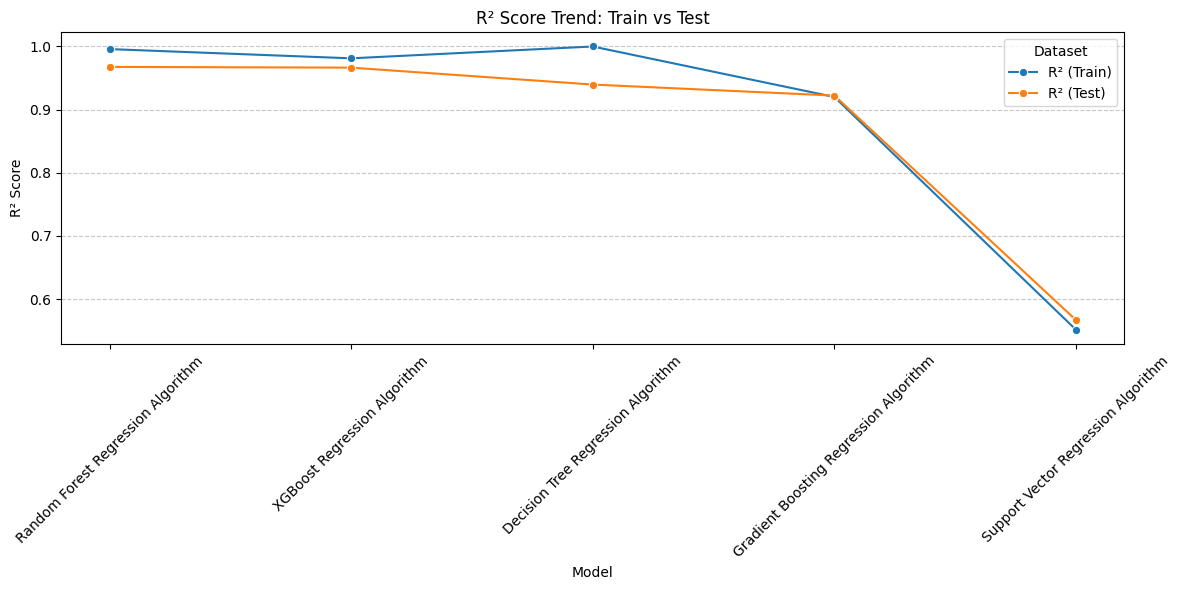

In [ ]:
print("\n")
print("LINE PLOT (WINSORIZED DATASET)")
print("\n")

plt.figure(figsize=(12, 6))
sns.lineplot(data=melted_df, x='Model', y='R² Score', hue='Dataset', marker='o')
plt.title("R² Score Trend: Train vs Test")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**FEATURE IMPORTANCE GRAPH FOR THE TREE - BASED MODELS**



FEATURE IMPORTANCE FOR THE MODELS (WINSORIZED DATASET)




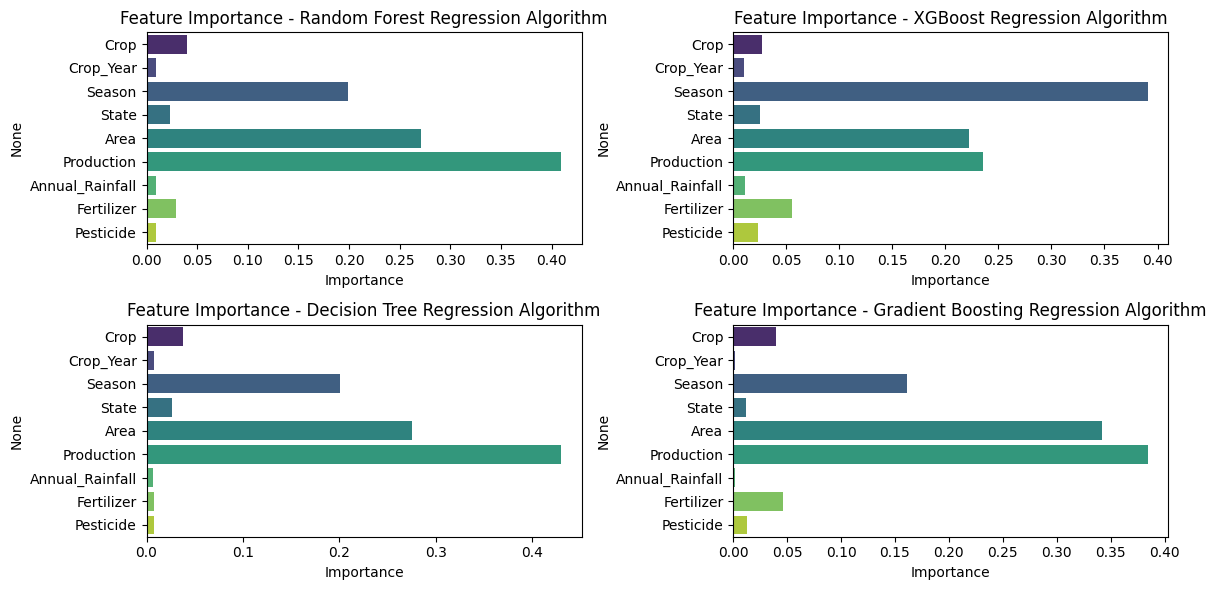

In [ ]:
print("\n")
print("FEATURE IMPORTANCE FOR THE MODELS (WINSORIZED DATASET)")
print("\n")

# Plot feature importance for tree-based models
feature_importance_models = ["Random Forest Regression Algorithm", "XGBoost Regression Algorithm", "Decision Tree Regression Algorithm", "Gradient Boosting Regression Algorithm"]
plt.figure(figsize=(12, 6))
for i, name in enumerate(feature_importance_models, 1):
    if name in models:
        model = models[name]
        model.fit(X_train, y_train)
        feature_importance = model.feature_importances_
        plt.subplot(2, 2, i)
        sns.barplot(x=feature_importance, y=X.columns, hue=X.columns, palette="viridis", legend=False)
        plt.title(f"Feature Importance - {name}")
        plt.xlabel("Importance")
plt.tight_layout()
plt.show()

**COMPARISON OF THE RESULTS**



Model Performance Comparison




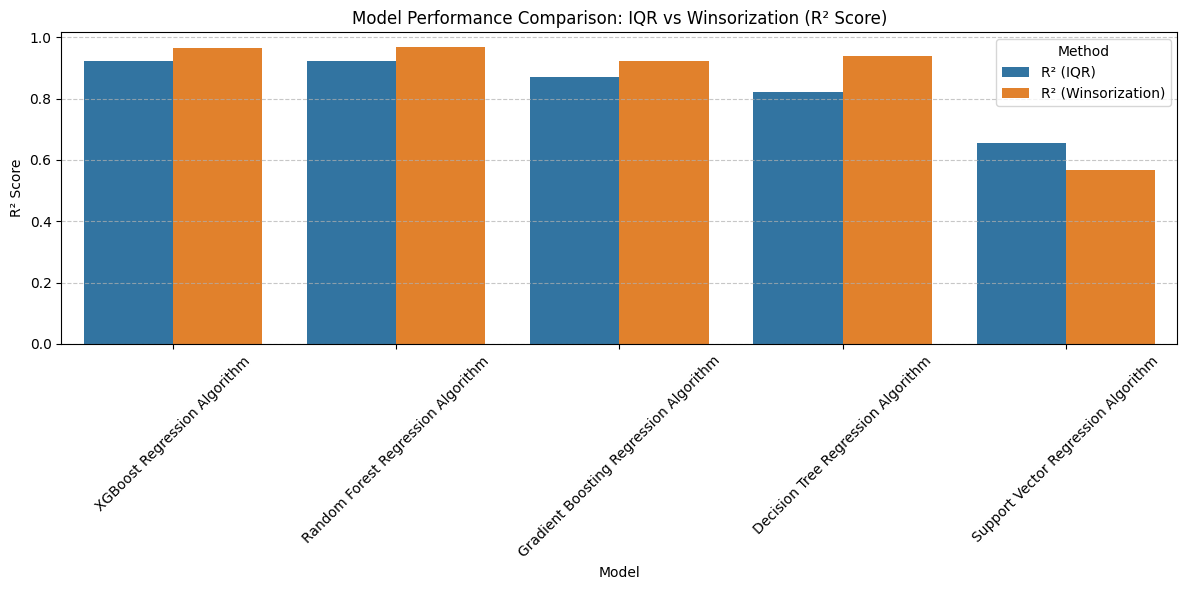

In [ ]:
print("\n")
print("Model Performance Comparison")
print("\n")

# Combine IQR and Winsorization results for comparison
comparison_df = pd.merge(
    iqr_results_df[["Model", "R² (Test)"]].rename(columns={"R² (Test)": "R² (IQR)"}),
    winsor_results_df[["Model", "R² (Test)"]].rename(columns={"R² (Test)": "R² (Winsorization)"}),
    on="Model"
)

# Melt the DataFrame for seaborn
comparison_melted = pd.melt(comparison_df, id_vars="Model", value_vars=["R² (IQR)", "R² (Winsorization)"],
                            var_name="Method", value_name="R² Score")

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x="Model", y="R² Score", hue="Method", data=comparison_melted)
plt.title("Model Performance Comparison: IQR vs Winsorization (R² Score)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**LINE PLOT FOR THE COMPARISON**



LINE PLOT FOR THE MODEL PERFORMANCE




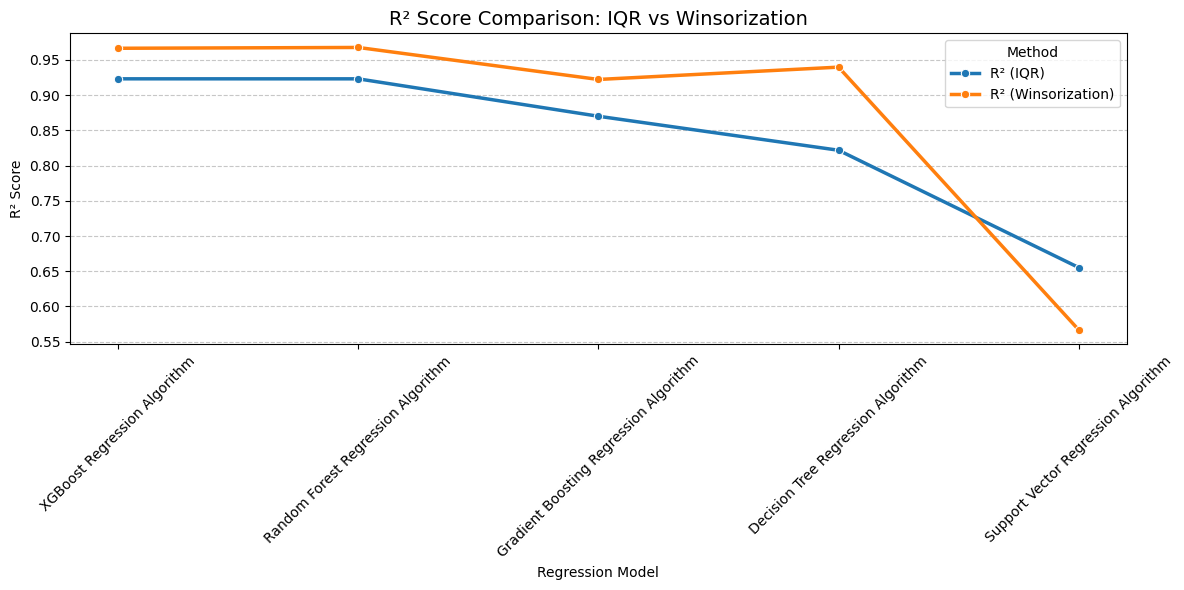

In [ ]:
# Line Plot for R² Score Comparison

print("\n")
print("LINE PLOT FOR THE MODEL PERFORMANCE")
print("\n")
plt.figure(figsize=(12, 6))

sns.lineplot(data=comparison_melted, x='Model', y='R² Score', hue='Method', marker='o', linewidth=2.5)

plt.title("R² Score Comparison: IQR vs Winsorization", fontsize=14)
plt.xlabel("Regression Model")
plt.ylabel("R² Score")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
